# APS1070
#### Basic Principles and Models - Project 1
**Deadline: May 31, 23:00 - 14 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Matthew C. McFee  

Student ID: 1005449631

##**Marking Scheme:**

This project is worth **14 marks** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).



# Project 1 [14 Marks] 
Let's take the tools we have learned in the tutorial and put them into practice on a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

## Part 1: Getting started [6 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, refer [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[1]**
* How many features do we have in this dataset? ___
* What are the target classes? ___
* What do these target classes signify?  ___
* How many participants tested `Malignant`? ___
* How many participants tested `Benign`? ___

In [ ]:
import numpy as np
import pandas as pd

# Check the dictionary items for the imported dataset 
# print(dataset.items())

# Store the data and targets in a new data frame (via concatenation), and get 
# the column names and add a column name for the targets column
# ref: https://numpy.org/doc/stable/reference/generated/numpy.c_.html
# ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
# ref: https://stackoverflow.com/questions/48769682/how-do-i-convert-data-from-a-scikit-learn-bunch-object-to-a-pandas-dataframe

# Store the feature data and target information in a new numpy array by 
# concatenating dataset.data and dataset.target 
# I could have also used np.concatenate()
dataset_clean = np.c_[dataset.data, dataset.target]

# Store the feature names and add a target column as well 
column_names = np.append(dataset.feature_names, ["targets"]) # Simplest method is to add the targets column name to the feature_names list 

# Convert the data to a pandas dataframe for easy data exploration
df = pd.DataFrame(dataset_clean, columns=column_names)

# Check for NA values and impute missing values if necessary
print(df.isna().sum())

# Take a look to see if the conversion worked out well

print(df.shape)
df.head(10)


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
targets                    0
dtype: int64
(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,targets
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0.0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0.0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0.0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0.0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0.0


I converted the np.array into a pandas dataframe first as this is more challenging than answering the specified questions. I am lucky, as the dataset is not full of NaN values and can be used as is. I will answer the questions of this segment now.

In [ ]:
print("The number of features is", len(dataset.feature_names))
print("The target classes are ", np.unique(dataset.target))
print("The target names are", dataset.target_names)
print("The number of malignant cases is", np.sum(dataset.target == 0))
print("The number of benign cases is", np.sum(dataset.target == 1))

The number of features is 30
The target classes are  [0 1]
The target names are ['malignant' 'benign']
The number of malignant cases is 212
The number of benign cases is 357


The results are as follows:

| Property             | Value             |
|----------------------|-------------------|
| # of features        | 30                |
| target class values  | 0, 1              |
| target class names   | malignant, benign |
| # of malignant cases | 212               |
| # of benign cases    | 357               |

Use `seaborn.implot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the dataset. Draw a plot where the x-axis is "mean radius", the y-axis is "mean texture," and the color of each datapoint indicates its class. Do this once again for different features for the x- and y-axis and see how the data is distributed. **[2]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. **[2]**

Standardize the data and plot those features again. **[1]**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


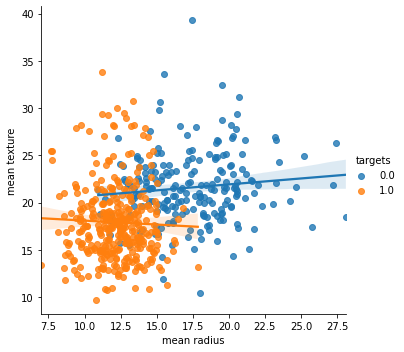

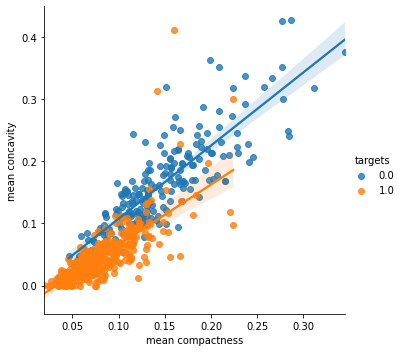

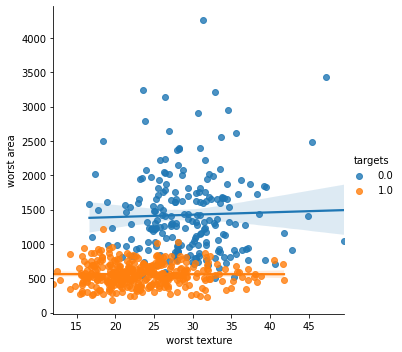

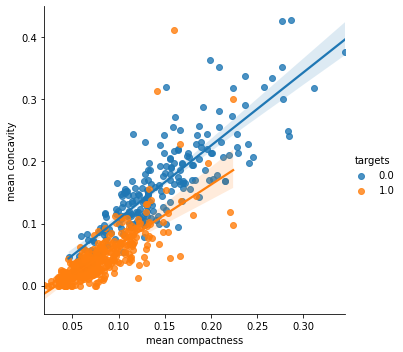

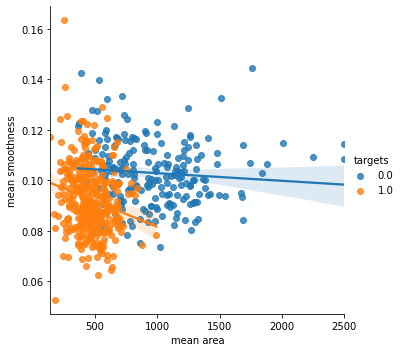

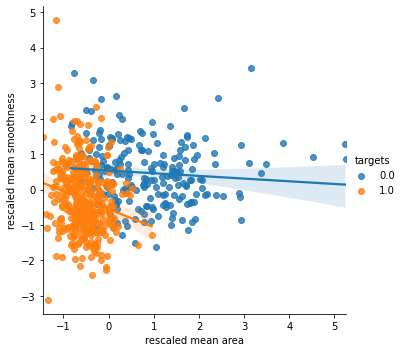

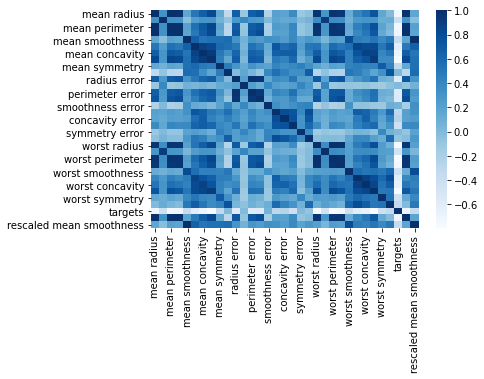

In [ ]:
# Import the necessary Python libraries
import matplotlib.pyplot as plt
import seaborn as sns
import random

my_lmplot = sns.lmplot("mean radius", "mean texture", hue="targets", data=df)
plt.show(my_lmplot)

# Use pairplot to visualize all of the variable relationships
# Sample or this takes forever to generate since there are a large # of features
# Super slow on Colab, I'm just going to manually select some.
# pairplot = sns.pairplot(df, hue="targets")
# lt.show(pairplot)

# Let's try some different variables together and see what they look like
# Should use plt.subplot() to make this a little more organized if I have time
lm1 = sns.lmplot("mean compactness", "mean concavity", hue="targets", data=df)
plt.show(lm1)

lm2 = sns.lmplot("worst texture", "worst area", hue="targets", data=df)
plt.show(lm2)

lm3 = sns.lmplot("mean compactness", "mean concavity", hue="targets", data=df)
plt.show(lm3)

# "mean area" and "mean smoothness" have very different scales
lm_plot_diff_scales = sns.lmplot("mean area", "mean smoothness", hue="targets",
                                 data=df)
plt.show(lm_plot_diff_scales)

# rescale "mean area" and "mean smoothness" manually and then plot again

def rescale_feature(data, feature):

  # This is just one example of a standardization technique 
  rescaled_feature = (data[feature] - data[feature].mean())/data[feature].std()

  new_col = "rescaled " + feature
  data[new_col] = rescaled_feature 

  return data

# Making a copy of the original data frame for safety (frame is small so this
# is fine)
df_bak = df.copy()

# Rescale the features with my function
df = rescale_feature(df, "mean area")
df = rescale_feature(df, "mean smoothness")

df.head()

# print(df.columns)

# Plot the selected rescaled features

lm_plot_rescaled = sns.lmplot('rescaled mean area', "rescaled mean smoothness",
                             hue="targets", data=df)

plt.show(lm_plot_rescaled)

# Let's look at correlations as well

corr = df.corr()
heatmap = sns.heatmap(corr, cmap="Blues")

In general it seems like the targets 0, and 1 are relatively well separated when comparing any two features. However, in each case there is usually a region where the two classes overlap (the clusters are close together). When considering rescaling two features with very different scales, in this case there wasn't any real change in the data distributions after the features were manually rescaled and plotted. This makes sense as a simple arithmetic operation on the data will not change it's distribution (e.g. adding 1 to every value from a normally distributed data set won't make the data non-normal). Scaling really corrects the issues that arise due to the Euclidean distances' sensitivity to scale (see ESLII for more details on the curse of dimenstionality etc.)

## Part 2: KNN Classifier [2 Marks]
We are going to create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

It is best practice to have a training set (from which there is a rotating validation subset) and test set. The main aim here is to obtain the best accuracy we can on the test set. To tune `k` (our hyperparameter), we employ cross-validation ([Help](https://scikit-learn.org/stable/modules/cross_validation.html)). Cross-validation automatically selects validation subsets from the data you send it (each of the folds is used as validation).

First, split the dataset into a train and a test set (80:20). The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete.
Follow these steps: **[2]**

* Using cross-validation, report mean cross-validation accuracy for a KNN classifier where you sweep k from 1 to 100. **Report your findings on a plot.**

* Base on this plot (that you just ran), find the best 'k' and report your test accuracy.

* Randomly select 5 different 'k', and use them on the test set to see if the cross-validation really found a good 'k' for us.


The optimum k is  5


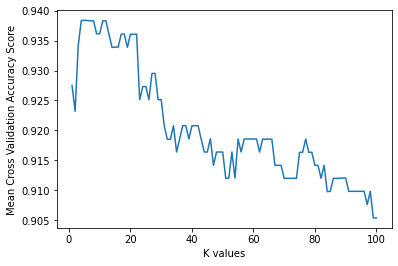

The accuracy on the test data (n=5) is 0.9210526315789473
The accuracy trying the heuristic is 0.9210526315789473


In [ ]:
# Import the necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Preprocess the data 

df_bak.head()

# Select everything but the last column for the features
X = df_bak.iloc[:,:-1].values
# Select just the target column for the target data
y = df_bak.iloc[:,-1].values

# Scale the data with StandardScaler

# scaler = StandardScaler()

# X = scaler.fit_transform(X)
# y = scaler.fit_transform(y)

# Graph of k-values maintains overall trend with different test/train splits
# but optimum k-value changes slightly so I set the random state here for 
# reproducibility. It seems k-neighbours is slightly sensitive to data splits
# etc. Could be due to unbalanced/small data set? 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=25)

# Find the optimum k by sweeping through 1 to 100 and recording mean accuracy
# scores using scikit-learn's built in cross-validation function
def find_scores(min, max, X_train, y_train):
 
  avg_cross_val_scores = []
  
  for k in range(min, max):
    knn = KNeighborsClassifier(n_neighbors=k)
    cvs = cross_val_score(knn, X_train, y_train, cv=10)
    mean_score = cvs.mean()
    avg_cross_val_scores.append(mean_score)

  return avg_cross_val_scores

k_values = range(1, 101)

scores = find_scores(1, 101, X_train, y_train)

# Find the k value (index of best accuracy in our sweep) and report it
# Remembering to add 1 as indexing starts at 0.
k_opt = scores.index(max(scores)) + 1
print("The optimum k is ", k_opt) # the graph confirms this value

plt.plot(k_values, scores)
plt.xlabel("K values")
plt.ylabel("Mean Cross Validation Accuracy Score")
plt.show()

# Train our model with k=5 on the training data and see how it performs on the
# test data. This is an odd k-value so ties won't be an issue. 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# This is our holdout data set that wasn't seen during training/cross val.
y_pred = knn.predict(X_test)

#print(y_pred)

# This our model performance (used accuracy but recall and precision are
# perhaps better choices)
print("The accuracy on the test data (n=5) is", accuracy_score(y_test, y_pred))

# Try using the heuristic sqrt(n) = k and see what happens out of curiosity 

knn_heur = KNeighborsClassifier(n_neighbors = 23)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("The accuracy trying the heuristic is", accuracy_score(y_test,y_pred))

[50, 98, 54, 6, 34]
[0.9122807017543859, 0.9035087719298246, 0.9122807017543859, 0.9298245614035088, 0.9210526315789473]


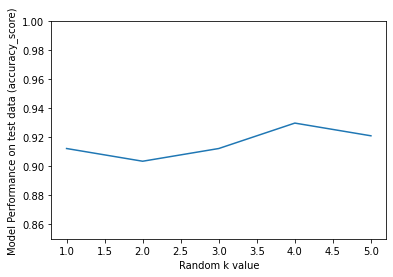

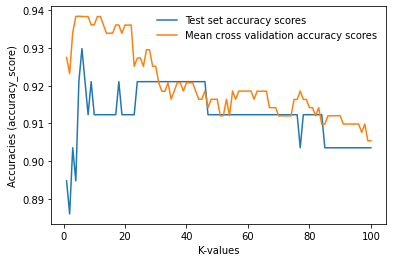

The optimum k-value according to test set performance is 6


In [ ]:
# Import the random library to help select 5 random k-values
import random

def random_k_test(min, max, X_train, y_train, X_test, y_test):

  # Setting a random seed for reproducibility 
  random.seed(0)

  # use random.sample to select 5 random values in the desired range
  random_ks = random.sample(range(1, 101), 5)
  print(random_ks)
  accuracy_scores = []
  k_values = range(1,101)

  for random_k in random_ks:

    knn = KNeighborsClassifier(n_neighbors=random_k)

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    score = accuracy_score(y_test, y_pred)
    accuracy_scores.append(score)

  return accuracy_scores

random_k_comparison = random_k_test(1, 101, X_train, y_train, X_test, y_test)

print(random_k_comparison)

plt.plot(range(1,6), random_k_comparison)
plt.xlabel("Random k value")
plt.ylabel("Model Performance on test data (accuracy_score)")
plt.ylim((0.85,1))
plt.show()

# Show the test accuracies as well

def find_test_accuracies(min, max, X_train, y_train, X_test, y_test):

  test_accuracies = []

  for k in range(min, max+1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracies.append(accuracy)
  
  return test_accuracies

results_test_accuracies = find_test_accuracies(1, 100, X_train, y_train, X_test,
                                               y_test)

# Generate the graph 

plt.plot(k_values, results_test_accuracies, label="Test set accuracy scores")
plt.plot(k_values, scores, label="Mean cross validation accuracy scores")
plt.xlabel("K-values")
plt.ylabel("Accuracies (accuracy_score)")
plt.legend(loc='upper right', frameon=False)
plt.show()

# What k-value is the test set accuracy maximized at. This is dangerous to use
# as I would be altering the model to fit the test data which destroys 
# generalizability 

# Add one to the index because indexing starts at 0
k_opt_test = results_test_accuracies.index(max(results_test_accuracies)) + 1
print("The optimum k-value according to test set performance is", k_opt_test)

Interestingly, the k value doesn't seem to change the performance of the trained model on the test set much. Perhaps it is because the data points are well separated in the feature space (one must also consider the difficulties associated with high dimensional data (ESL II). Additionally, the optimum k value changes depending on how the data is split but stays around 2-10. Either way, later in the assignment randomly select k-values seem to perform as well, if not slightly better, on the test data as the "optimum" k-value I selected.

The results are summarized as follows. 

The optimum k from finding the index of the maximum training accuracy during cross validation, and from the graph I generated indicated that k=5 would be the best k-value. However, picking random k-values produced similar performance on the holdout set as follows.

The model performance on hold out set with the **optimum k-value**: 92.10526315789473%


| Random k-value | Accuracy on test set (%) |
|----------------|--------------------------|
| 50             |    91.22807017543859     |
| 98             |    90.35087719298246     |
| 54             |    91.22807017543859     |
| 6              |    92.98245614035088     |
| 34             |    92.10526315789473     |

Upon inspection of the test set accuracies for each k-value, there appears to be a peak in test set accuracy at a slightly larger k-value than in the cross validation scores. 


## Part 3: Playing with the features [3 Marks]
In the last practice, we used all the features in our dataset to classify the tumors. Now we want to see:  **[3]**
* Are all of these features necessary to get the same level of accuracy on the test set? 
* Is it possible to get better accuracy with fewer features? 
* Which features are essential to get 95\% of the accuracy? The minimum number of features is desired.

You should develop some experiments to investigate the answer of these questions. **For each part summarize your experiments in tables or plots.**

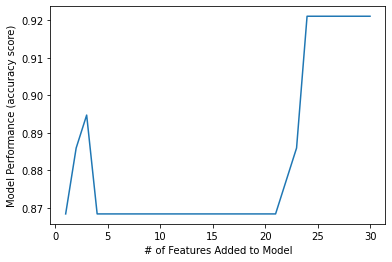

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


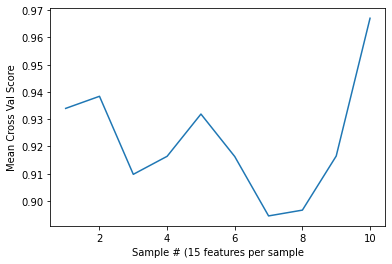

In [ ]:
# Are all of these features necessary to get the same level of accuracy on the 
# test set? 

# A simple, but limited method to check this would be to add one feature at a 
# time and see if there is any odd fluctuations in model performance. This would
# be similar to removing one model feature at a time.

def additive_features_test(X_train, y_train, X_test, y_test, num_features):

  model_performances = []

  for i in range(1, num_features+1):
    
    X = X_train[:,:i]
    y = y_train
    X_test2 = X_test[:,:i]
  
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X, y)

    y_pred= knn.predict(X_test2)
    model_performances.append(accuracy_score(y_test, y_pred))
  
  return model_performances

results = additive_features_test(X_train, y_train, X_test, y_test, 30)

results = plt.plot(range(1, 31), results)
plt.xlabel("# of Features Added to Model")
plt.ylabel("Model Performance (accuracy score)")
plt.show()

# Generate a graph randomly selecting features to see how sensitive the model is 
# to feature selection

import random

df = df_bak.copy()
df.head()
knn = KNeighborsClassifier(n_neighbors=5)

# Function that creates 10 random samplings of 15 features and compares 
# cross val scores.

def randomly_select_features(df, model):
  
  random_accuracies = []

  for i in range (1, 11):
    X = df.sample(15, axis=1).values
    y = df.iloc[:,-1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=25)
    
    accuracy = cross_val_score(model, X_train, y_train, cv=10).mean()
    

    random_accuracies.append(accuracy)

  return random_accuracies

print(dataset.feature_names.tolist())
results_random_samp = randomly_select_features(df, knn)

sample_numbers = range(1, 11)

# Generate the plot

plt.plot(sample_numbers, results_random_samp)
plt.xlabel("Sample # (15 features per sample")
plt.ylabel("Mean Cross Val Score")
plt.show()

From this graph the sharp drops in performance when adding certain features, especially features 5. Adding features up to column 21 seems to do little to improve performance. But eventually when adding feature 21 to around 23 the model improves and then drops again. This implies that some features are more important than others, and that including certain features in the model may be decreasing the performance of the model. Thus, I am lead to believe that not all features are necessary to generate model that performs well with this kind of dataset. Thus, I am going to manually remove the features that seem to be decreasing model effectiveness manually, and then comparing my selections to feature selections (not PCA) included in the scikit-learn library. Random selection of subsets of 15 variables showed that >93% accuracy on the test set was obtainable for certain subsets of features which is interesting as well.

In [ ]:
# Is it possible to get better accuracy with fewer features? 

# Let's only include features 1-4, and features 21-23 to see if removing 
# features helps to improve accuracy

X_train_reduced = X_train[:,[0,1,2,3,20,21,22]]
X_test_reduced = X_test[:,[0,1,2,3,20,21,22]]

print(X_train_reduced.shape) # The features were removed successfully

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_reduced, y_train)

y_pred = knn.predict(X_test_reduced)

print(accuracy_score(y_test,y_pred))

(455, 7)
0.8947368421052632


It seems like my decisions reduced model performance slightly. This is likely because I missed a useful feature or increasing model bias. However, 89% accuracy is still at least 95% of the 92% test accuracy seen by fitting the model on all features and then making predictions on the test set. Let's now compare  my results with a built in method to determine feature importance.

The feature importances are [0.06064927 0.01231496 0.06339695 0.05226647 0.00520613 0.00924334
 0.05231882 0.11537243 0.00486595 0.00504342 0.0084196  0.00165233
 0.01272779 0.05436467 0.00377569 0.00232587 0.00963899 0.00398849
 0.00375798 0.00328557 0.10470316 0.01649801 0.11577726 0.11016243
 0.01291728 0.02122183 0.03553262 0.08491494 0.00997253 0.0036852 ]
The list of all features is ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Features with importance > 0.01 are ['mean radius' 'm

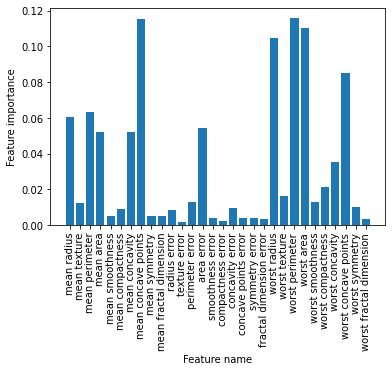

The optimum k with RFC/SelectFromModel feature selection is  8


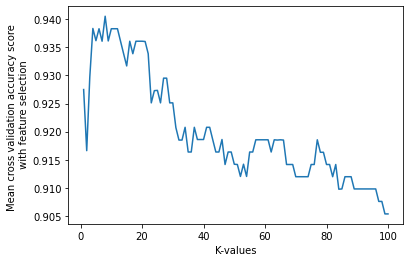

In [ ]:
# Which features are essential to get 95% of the accuracy? The minimum
# number of features is desired.

# Here I will use a RandomForestClassifiers feature_importance_ value to find the
# the features with the greatest model performance. I will then use only these
# and see if I can reach 95% accuracy. 

from sklearn.ensemble import RandomForestClassifier

# This also has hyperparameters that can be tuned but I am just trying
# default settings here. 
rfc = RandomForestClassifier(random_state=25)

rfc.fit(X_train, y_train)

# Print the feature importances so I can check them. 
# Feature importances are determined by finding how much impurity decreases
# when a split occurs on a given feature (it considers this impurity decrease
# across many trees in a random forest)
print("The feature importances are", rfc.feature_importances_)
print("The list of all features is", dataset.feature_names)

# Select features with importances great than > 0.01 by filtering
imp_feats = dataset.feature_names[rfc.feature_importances_ > 0.01]

# The filter features include features 1-8, 13, 21-28 assuming first column is 
# called 1, the indexs are all these numbers -1 
print("Features with importance > 0.01 are", imp_feats)

df = df_bak.copy()

X_train_reduced = X_train[:,[0, 1, 2, 3, 6, 7, 12, 13, 20, 21, 22, 23, 24, 25, 26, 27]]
X_test_reduced = X_test[:,[0, 1, 2, 3, 6, 7, 12, 13, 20, 21, 22, 23, 24, 25, 26, 27]]

knn_r = KNeighborsClassifier(n_neighbors=5)

knn_r.fit(X_train_reduced, y_train)

y_pred =  knn_r.predict(X_test_reduced)

print("The accuracy selection features of importance > 0.01 is", 
      accuracy_score(y_test,y_pred)) # Didn't work very well

# Let's try to be more strict with our feature selection

imp_feats = dataset.feature_names[rfc.feature_importances_ > 0.1]

print("The features with > 0.1 importance are", imp_feats) # columns 22, 27

X_train_reduced = X_train[:,[7, 20, 22, 23]]
X_test_reduced = X_test[:,[7, 20, 22, 23]]

knn_r.fit(X_train_reduced, y_train)

y_pred = knn_r.predict(X_test_reduced)

print("Accuracy on test set using features > 0.1 importance is",
      accuracy_score(y_test, y_pred))

# SelectFromModel exists to select a set of features based on feature importances
# or model coefficients (linear models etc.) and then selects a subset of the
# features based on some threshold value (here I used mean feature importance
# as the threshold)

from sklearn.feature_selection import SelectFromModel

# Threshold means that feature importances > mean value are selected
model = SelectFromModel(rfc, prefit=True, threshold='mean')

X_train_min = model.transform(X_train)
X_test_min = model.transform(X_test)

print(X_train_min.shape)

# Let's test the features selected by SelectFromModel

knn_r.fit(X_train_min, y_train)
y_pred = knn_r.predict(X_test_min)

print("The accuracy using features selected with rfc and SelectFromModel is", 
      accuracy_score(y_test, y_pred))

# Let's plot the rfc feature importances as well to help with visualization

plt.bar(dataset.feature_names, rfc.feature_importances_)
plt.xlabel("Feature name")
plt.ylabel("Feature importance")
plt.xticks(rotation=90)
plt.show()

# Let's try using a linear model to select features as well and plot that
# References the sklearn documentation on feature selection

# from sklearn.svm import LinearSVC

# Could tune hyperparameter C, and change penalty as well 
# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False, max_iter=2000).fit(X_train, y_train)
# model = SelectFromModel(lsvc, prefit=True)

# X_train_lsvc = model.transform(X_train)

# print(X_train_lsvc.shape)

# Try a different threshold method for select from model 

# Now let's try different k's again to see if the optimum k has changed after
# feature selection. We will use the features selected by RFC and SelectFromModel
# and the find_scores function I wrote earlier and graph with matplotlib.

scores_feature_selection = find_scores(1, 101, X_train_min, y_train)

k_opt_feature_selection = scores_feature_selection.index(max(scores_feature_selection)) + 1
print("The optimum k with RFC/SelectFromModel feature selection is ",
      k_opt_feature_selection)

plt.plot(k_values, scores_feature_selection)
plt.xlabel("K-values")
plt.ylabel("Mean cross validation accuracy score \n with feature selection")
plt.show()

It turns out that feature selection with RandomForestClassifier (feature_importances_) and manually selecting the most important features from the graph and bar chart did not work well. Trying different thresholds of importance also did not work well reducing model performance on the test set slightly. That being said, I know tweaking the model until it fits the data set perfectly is overfitting. My findings are summaring in the table below

| Feature Selection Method  |# of Features| Model performance (accuracy )  | Is at least 0.95*92.11% | 
|---------------------------|--------------|--------------------------------|----------|
| RandomForestClassifier() + feature importance > 0.01|16 |92.11%    | Yes|
| RandomForestClassifer() + feature importance > 0.1|4 |89.47% | Yes |
| RandomForestClassifer() + SelectFromModel()|11 |92.11%| Yes |
| Manual selection of features from graph | 7 | 89.47% | Yes |


I learned overall that feature selection can be a difficult process. I am also going to try playing with PCA even though it will covered later in the class to see if I can improve things. We can go as low as 11 features and maintain a ~92% accuracy, and dropping down to 4 will still have ~89% test accuracy which is at least 95% of the cross-val accuracy I found which meets the requirement of the question. I'll sweep through 2-5 for the PCA feature space and see what happens.

Resweeping through k values 1 to 100 after feature selection with RFC and SelectFromModel reveals that the optimum k-value changes when you change the feature space. Thus, it seems like performing feature selection before model selection may be a good idea.

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.9163768115942028, 0.9361835748792272, 0.9361835748792272, 0.9384057971014494, 0.9384057971014494, 0.9384057971014494, 0.9384057971014494, 0.9384057971014494, 0.9384057971014494, 0.9384057971014494]


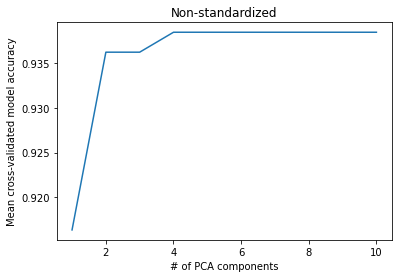

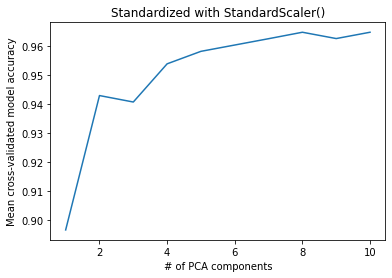

In [ ]:
# PCA functions by determining the directions of greatest variance, and then 
# uses linear algebra (eigenvalue decompositions) to project each data point
# vector onto a new, small feature space determined by the directions of 
# maximum variance. 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def pca_feature_space_analysis(X_train, y_train, max_comps):

  scores = []

  for dimension in range(1, max_comps+1):
    
    pca = PCA(n_components=dimension)

    pca.fit(X_train)
    X_train_transformed = pca.transform(X_train)

    knn = KNeighborsClassifier(n_neighbors=5)
    
    score = cross_val_score(knn, X_train_transformed, y_train, cv=10).mean()

    scores.append(score)

  return scores

# Generate plots to look at the results

scores = pca_feature_space_analysis(X_train, y_train, 10)

num_pca_comps = range(1, 11)

print(list(num_pca_comps))
print(scores)

plt.plot(num_pca_comps, scores)
plt.xlabel("# of PCA components")
plt.ylabel("Mean cross-validated model accuracy")
plt.title("Non-standardized")
plt.show()

sc = StandardScaler()
sc.fit(X_train)
X_train_standard = sc.transform(X_train)
X_test_standard = sc.transform(X_test)

scores_standard = pca_feature_space_analysis(X_train_standard, y_train, 10)

plt.plot(num_pca_comps, scores_standard)
plt.title("Standardized with StandardScaler()")
plt.xlabel("# of PCA components")
plt.ylabel("Mean cross-validated model accuracy")
plt.show()

The above graphs suggest that the feature space can be decomposed to just 4 features (instead of 30) and reach an accuracy of ~93% without any feature scaling and with feature scaling, following the same method the feature space can be decomposed to 2 features to get similar results, and with 7 features the model performs maximally. It seems to me that the minimum number of features really is up to the technique you choose to use, and how your data is preprocessed as well. I don't think there is a "right" answer in this case as suggested by the on going research into feature selection techniques.  

Finally, let's try recursive feature extraction (RFE) as discussed on the Piazza board out of curiosity.


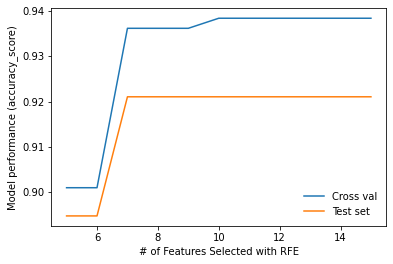

In [ ]:
# This is the exact opposite of what I did in the first part of this section.
# Instead of sequentially adding features into the model and seeing what happens,
# RFE removes features one at a time until only a specified number of features
# are left in the model. 

from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestClassifier

# Setup the RandomForestClassifier

rfc = RandomForestClassifier(random_state=25)

# Just going to use a for loop here instead of a function

feature_accuracy_scores = []
test_accuracy_scores = []

# Trying max 10 features based on previous results

knn_rfe = KNeighborsClassifier(n_neighbors=5)

# Selected a reasonable test range here

for i in range (5, 16):
  feature_selector = RFE(rfc, n_features_to_select=i, step=1)
  feature_selector.fit(X_train, y_train)

  X_train_rfe = feature_selector.transform(X_train)
  X_test_rfe = feature_selector.transform(X_test)

  knn_rfe.fit(X_train_rfe, y_train)
  
  y_pred = knn_rfe.predict(X_test_rfe)

  accuracy = cross_val_score(knn_rfe, X_train_rfe, y_train, cv=10).mean()

  feature_accuracy_scores.append(accuracy)

  test_accuracy_scores.append(accuracy_score(y_test,y_pred))

# Generate a plot of the RFE results 

num_features_rfe = range(5, 16)

plt.plot(num_features_rfe, feature_accuracy_scores, label="Cross val")
plt.plot(num_features_rfe, test_accuracy_scores, label="Test set")
plt.xlabel("# of Features Selected with RFE")
plt.ylabel("Model performance (accuracy_score)")
plt.legend(loc='lower right', frameon=False)
plt.show()

## Part 4: Standardization [3 Marks]
Try to apply KNN with and without standardizing the data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)). Report how standardization affects the accuracy.  **Describe your findings in graphs or tables. [3]**

In [ ]:
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() 

sc.fit(X_train)

X_train_standard = sc.transform(X_train)

X_test_standard = sc.transform(X_test)

In [ ]:
knn_standard = KNeighborsClassifier(n_neighbors=5)
knn_standard.fit(X_train_standard, y_train)

y_pred = knn_standard.predict(X_test_standard)

print("The accuracy of the model with scaling is", accuracy_score(y_test,y_pred))

The accuracy of the model with scaling is 0.956140350877193


We can see that the accuracy is greatly **improved** when features are scaled with StandardScaler(). This is particularly important for many machine learning algorithms, and neural networks require the data to be standardized or they will not work. 





In [ ]:
# Let's try feature selection and scaling now

rfc = RandomForestClassifier(random_state=25)
rfc.fit(X_train, y_train)

model = SelectFromModel(rfc, prefit=True, threshold='mean')

X_train_min_sc = model.transform(X_train_standard)
X_test_min_sc = model.transform(X_test_standard)

knn_standard.fit(X_train_min_sc, y_train)

y_pred = knn_standard.predict(X_test_min_sc)

print("The accuracy of the model with scaling and feature selection is",
      accuracy_score(y_test,y_pred))

# This actually reduced the models test accuracy. 

The accuracy of the model with scaling and feature selection is 0.9122807017543859


Let's see how scaling effects different k-values as well.

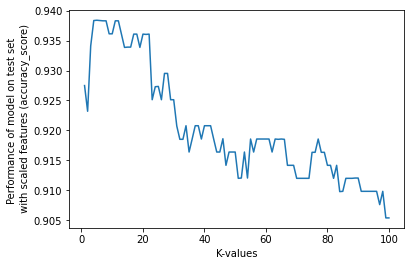

In [ ]:
# Sweep through k's again seeing if the performance curve changed much with scaling

results = find_scores(1, 101, X_train, y_train)

plt.plot(k_values, results)
plt.xlabel("K-values")
plt.ylabel("Performance of model on test set \n with scaled features (accuracy_score)")
plt.show()


The above results indicate that model performance is positively impacted by scaling features. Rerunning the optimum k value generates a plot which is simply moved upwards along the y-axis in comparison to the sweep graph when no feature scaling was used. A summary of the scaling impact on model performances can be found below.

| Data preprocessing method | Model performance (accuracy) |
|---------------------------|--------------------------------|
|No scaling, no feature selection              |  92.11%                        |
|Scaling, no feature selection |  95.61%                     |  
|Scaling, feature selection | 91.23%

Let's now try some other standardization techniques and compare them to the performance of StandardScaler().




In [ ]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, MaxAbsScaler

mms = MinMaxScaler(feature_range=(0,1))
nrm = Normalizer(norm='l2')

# I could write a function that takes a list of standardization methods then
# tests each and prints the results, but I don't think it is really necessary.

# MinMaxScaler

mms.fit(X)
X_train_mms = mms.transform(X_train)
X_test_mms = mms.transform(X_test)

knn_r.fit(X_train_mms, y_train)
y_pred = knn_r.predict(X_test_mms)

print("The model accuracy scaling with MinMaxScaler is", 
      accuracy_score(y_test,y_pred))

# Normalizer 

nrm.fit(X_train)

X_train_nrm = nrm.transform(X_train)
X_test_nrm = nrm.transform(X_test)
y_pred = knn_r.predict(X_test_nrm)

print("The model accuracy scaling with Normalizer is", 
      accuracy_score(y_test,y_pred))

# MaxAbsScaler

mas = MaxAbsScaler()

mas.fit(X_train)

X_train_mas = mas.transform(X_train)
X_test_mas = mas.transform(X_test)
y_pred = knn_r.predict(X_test_mas)

print("The model accuracy scaling with MaxAbsScaler is", 
      accuracy_score(y_test,y_pred))

The model accuracy scaling with MinMaxScaler is 0.956140350877193
The model accuracy scaling with Normalizer is 0.6578947368421053
The model accuracy scaling with MaxAbsScaler is 0.8070175438596491


The following describes changes to model performance when using different data standardization techniques:

| Standardization Method | Model performance (accuracy)     |
|---------------------------|--------------------------------|
|StandardScaler() |  95.61%                                  |  
|MinMaxScaler() | 95.61%                                     |
|Normalizer() | 65.79%                                       |
|MaxAbsScaler() | 80.70%                                     |

It is clear to me that selecting an appropriate scaling method is very important in regards to model performance. 

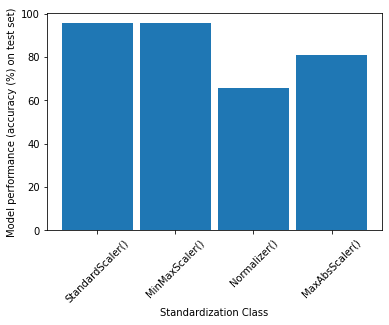

In [ ]:
# Plot a graph of the standardization methods results

methods = ["StandardScaler()", "MinMaxScaler()", "Normalizer()", 
           "MaxAbsScaler()"]
performances = [95.61, 95.61, 65.79, 80.70]

plt.bar(methods, performances, width=0.9)
plt.xlabel("Standardization Class")
plt.xticks(rotation=45)
plt.ylabel("Model performance (accuracy (%) on test set)")
plt.show()